## Project #7: Wine quality classification
Students: Mai Ha Lan & Nguyen Van Duc

<div> The <a href="https://archive.ics.uci.edu/ml/datasets/wine+quality"/>two datasets</a> are related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.) like this.
Input variables (based on physicochemical tests): </div>
    <ul>1 - fixed acidity</ul>
    <ul>2 - volatile acidity</ul>
    <ul>3 - citric acid</ul>
    <ul>4 - residual sugar</ul>
    <ul>5 - chlorides</ul>
    <ul>6 - free sulfur dioxide</ul>
    <ul>7 - total sulfur dioxide</ul>
    <ul>8 - density</ul>
    <ul>9 - pH</ul>
    <ul>10 - sulphates</ul>
    <ul>11 - alcohol </ul>
     
Output variable (based on sensory data): <br>
    12 - quality (score between 0 and 10)

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. 

Requirements:
1.	Classification type of wine with 4800 first of lines; 
2.	Use the last 98 of lines to test.


### Problem analysis:
- This is a supervised problem with known output data (wine quality in numeric 0 --> 10)
- This problem can be viewed as classification by bining the the output as 3 different categories (poor, normal, excellent) or regression in which the output is presented in numerical values.
- The requiremnt is to work on 4898 lines which is from white-wine dataset. So, the focus will be on white-wine dataset only
- We assess to apply regression method for this problem.

### Problem break down:
- Data preparation: load, display/plot statistic summary (mean, correlation, variance, ...) to understand the dataset. Based on that, number of preprocessing tasks may require for evaluated algorithm later on. 
- Algorithms spot check: select algorithms to evaluate, do cross validation for each, compare the result with Mean Square Error metric, apply some preprocessing techniques if needed to improve the result.
- Algorithm fine tuning: Perform the fine tunning method GridSearchCV to find best param for the training dataset
- Finalize the model, perform the test, update the result

In [2]:
# Load library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime

### 1. Data preparation

In [3]:
#Load data
dataset = pd.read_csv("./Data/winequality-white.csv", delimiter=';')
#2.2 Descriptive observation (statistical view)
print(f"Shape:\n{dataset.shape} \n\nDatatype:\n{dataset.dtypes}")

Shape:
(4898, 12) 

Datatype:
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [4]:
# Look at raw data, the attributes are measured in different unit which may need to do scaling later on as the prefer input data for some algorithms
dataset.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
# Look at summarized descriptive data
pd.set_option('precision', 1)
display(dataset.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.0,4.9e+03,4898.0,4898.0,4.9e+03,4898.0,4898.0,4.9e+03,4898.0,4898.0,4898.0,4898.0
mean,6.9,2.8e-01,0.3,6.4,4.6e-02,35.3,138.4,9.9e-01,3.2,0.5,10.5,5.9
std,0.8,1.0e-01,0.1,5.1,2.2e-02,17.0,42.5,3.0e-03,0.2,0.1,1.2,0.9
min,3.8,8.0e-02,0.0,0.6,9.0e-03,2.0,9.0,9.9e-01,2.7,0.2,8.0,3.0
25%,6.3,2.1e-01,0.3,1.7,3.6e-02,23.0,108.0,9.9e-01,3.1,0.4,9.5,5.0
50%,6.8,2.6e-01,0.3,5.2,4.3e-02,34.0,134.0,9.9e-01,3.2,0.5,10.4,6.0
75%,7.3,3.2e-01,0.4,9.9,5.0e-02,46.0,167.0,1.0e+00,3.3,0.6,11.4,6.0
max,14.2,1.1e+00,1.7,65.8,3.5e-01,289.0,440.0,1.0e+00,3.8,1.1,14.2,9.0


In [6]:
# One of the way to check the nomalization of dataset is to look at the skewness
# Getting to zero is to become more normalized
skew = dataset.skew()
print(skew)

fixed acidity           0.6
volatile acidity        1.6
citric acid             1.3
residual sugar          1.1
chlorides               5.0
free sulfur dioxide     1.4
total sulfur dioxide    0.4
density                 1.0
pH                      0.5
sulphates               1.0
alcohol                 0.5
quality                 0.2
dtype: float64


In [7]:
# Correlation look
# It is better to see the correlation in visualization rather than table


pd.set_option('precision', 2)
display(dataset.corr(method='pearson'))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-0.02,2.89e-01,0.09,0.02,-4.94e-02,9.11e-02,0.27,-4.26e-01,-0.02,-0.12,-1.14e-01
volatile acidity,-0.02,1.00,-1.49e-01,0.06,0.07,-9.70e-02,8.93e-02,0.03,-3.19e-02,-0.04,0.07,-1.95e-01
citric acid,0.29,-0.15,1.00e+00,0.09,0.11,9.41e-02,1.21e-01,0.15,-1.64e-01,0.06,-0.08,-9.21e-03
residual sugar,0.09,0.06,9.42e-02,1.00,0.09,2.99e-01,4.01e-01,0.84,-1.94e-01,-0.03,-0.45,-9.76e-02
chlorides,0.02,0.07,1.14e-01,0.09,1.00,1.01e-01,1.99e-01,0.26,-9.04e-02,0.02,-0.36,-2.10e-01
free sulfur dioxide,-0.05,-0.10,9.41e-02,0.30,0.10,1.00e+00,6.16e-01,0.29,-6.18e-04,0.06,-0.25,8.16e-03
total sulfur dioxide,0.09,0.09,1.21e-01,0.40,0.20,6.16e-01,1.00e+00,0.53,2.32e-03,0.13,-0.45,-1.75e-01
density,0.27,0.03,1.50e-01,0.84,0.26,2.94e-01,5.30e-01,1.00,-9.36e-02,0.07,-0.78,-3.07e-01
pH,-0.43,-0.03,-1.64e-01,-0.19,-0.09,-6.18e-04,2.32e-03,-0.09,1.00e+00,0.16,0.12,9.94e-02
sulphates,-0.02,-0.04,6.23e-02,-0.03,0.02,5.92e-02,1.35e-01,0.07,1.56e-01,1.00,-0.02,5.37e-02


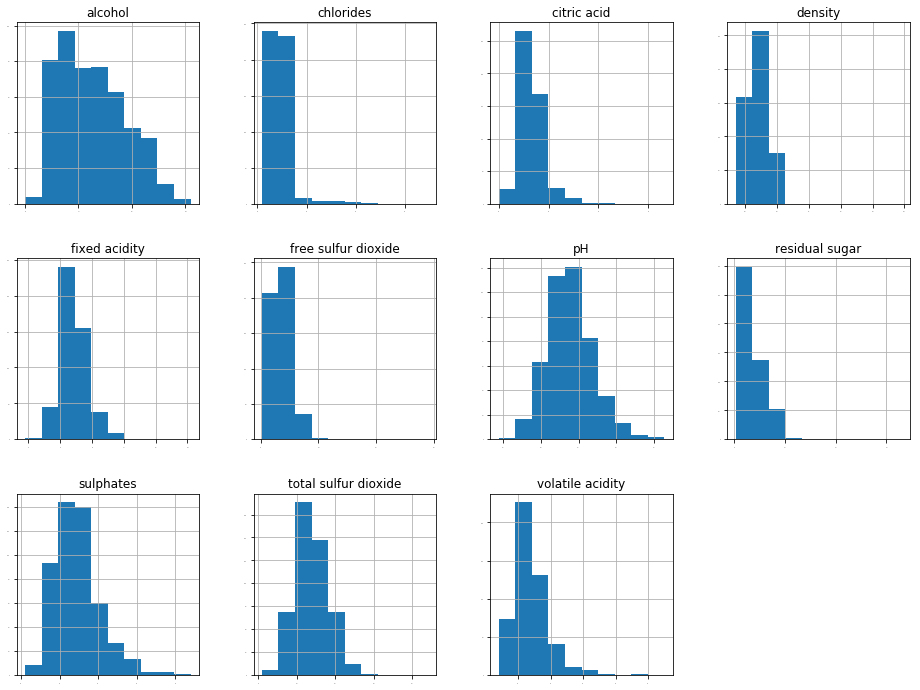

In [7]:
#Visualize data with histogram plot
dataset.drop(columns='quality').hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, layout=(3,4), figsize=(16, 12))
plt.show()

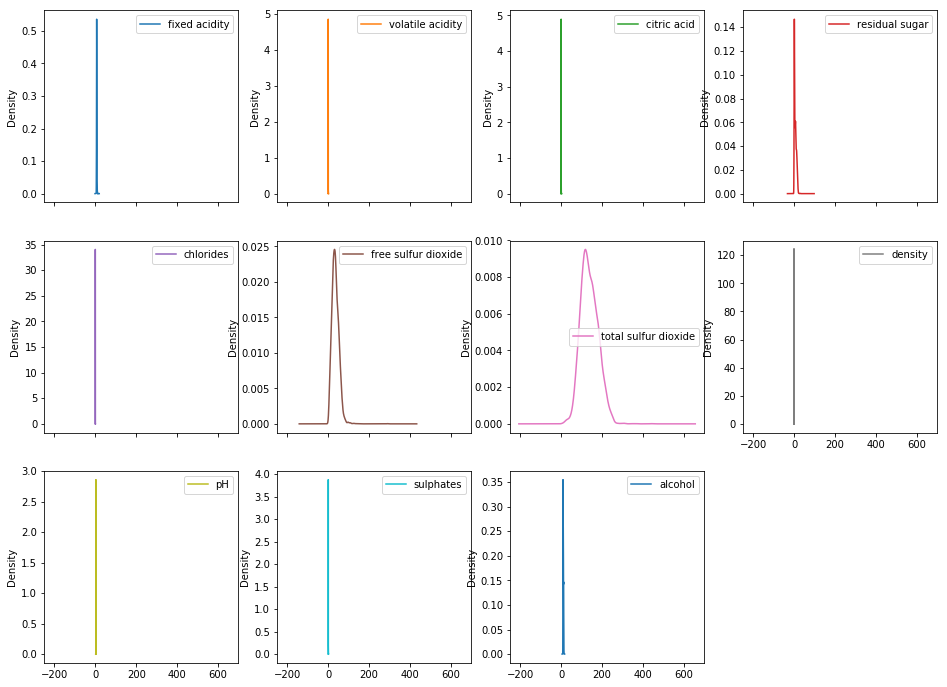

In [8]:
# Density chart can give the better view compared to histogram to define which one is in normal distribution, or which one is skew
dataset.drop(columns='quality').plot(kind='density', subplots=True, layout=(3,4), figsize=(16,12))
plt.show()

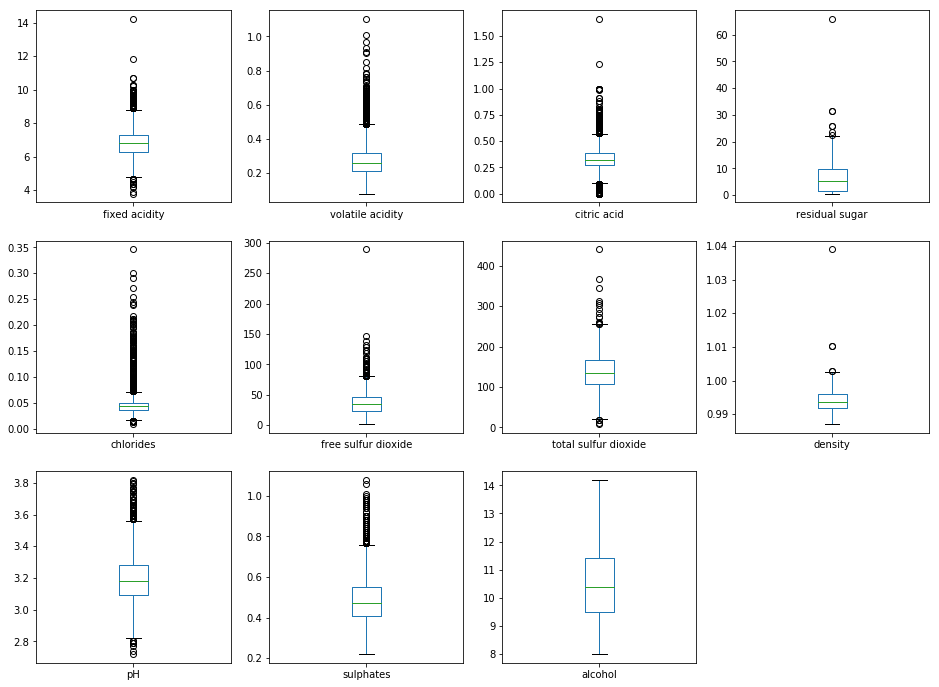

In [9]:
#Box plot view to see if any outliers detected as well as the range distribution by quantiles
dataset.drop(columns='quality').plot(kind='box', subplots=True, layout=(3,4), figsize=(16,12))
plt.show()

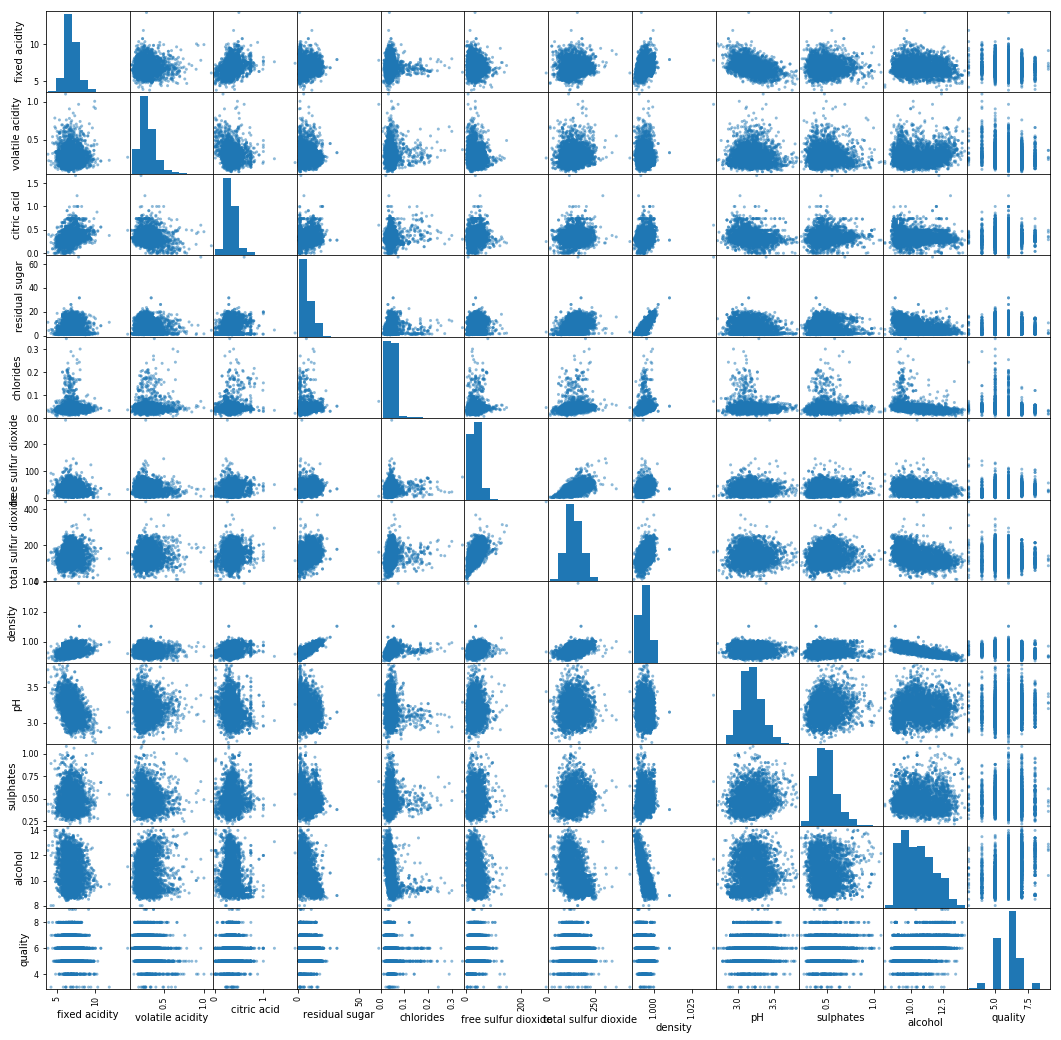

In [10]:
#Scatter plot view to see the correlation between attributes
pd.plotting.scatter_matrix(dataset, figsize=(18,18))
plt.show()

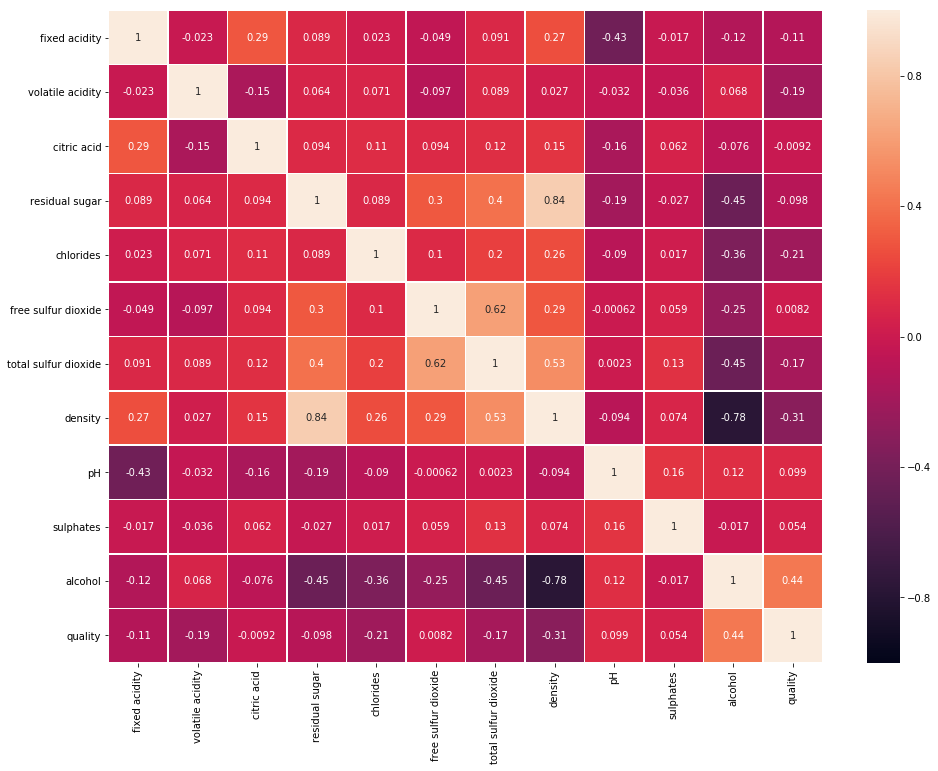

In [11]:
#Visualize the relationship between attributes using heat map. This grapth better to provide the correlation in number. Normally, the result >0.7 or <-0.7 is telling the strong relationship.
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(dataset.corr(), vmax=1, vmin=-1, annot=True, ax=ax, linewidths=0.5)

### 3. Prepare data

In [17]:
# Raw input data
# Separate the data for training purpose
training_dataset = dataset.iloc[:4800, :12]
test_dataset = dataset.iloc[4800:, :12]

#Training data set#1: raw data without modification
X_train = np.float64(training_dataset.values[:, :11])
Y_train = np.float64(training_dataset.values[:, 11])
X_test = test_dataset.values[:, :11]
Y_test = test_dataset.values[:, 11]

#### 3.1 Clean data

In [18]:
# Check missing data
# Data is clean
dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [19]:
# Remove duplicate & prepare for the traning
# Note: duplicate removal is not applicable for Naive Bayes & CNN
df_tmp = pd.DataFrame(dataset.duplicated(keep="first"))
df_tmp.groupby(0)[0].value_counts()

False  False    3961
True   True      937
Name: 0, dtype: int64

In [20]:
# Separate the data for training purpose
training_dataset = dataset.drop_duplicates().iloc[:4800, :12]
test_dataset = dataset.iloc[4800:, :12]

#Training data set#2: remove duplicates
X_train_dup_rev = training_dataset.values[:, :11]
Y_train_dup_rev = training_dataset.values[:, 11]
X_test_dup_rev = test_dataset.values[:, :11]
Y_test_dup_rev = test_dataset.values[:, 11]


#### 3.2 Select features
- This step is to analyse which attributes do not contribute much to model accuracy. 
- Outcome of this step are to reduce the noise and devcrease training time.
- In this problem, we approach 2 methods: remove high correlated attributes & remove attribute with less important feature for tree-base algorithms

##### 3.2.1 Correlatted attribute:

In [21]:
# Correlatted attribute:
# The correlation between densisity & alcohol is 0.78 which means we can remove one of these 2 attributes from dataset.
# Common threshold is +/-0.7

# Separate the data for training purpose
training_dataset = dataset.drop(columns="density").iloc[:4800, :11]
test_dataset = dataset.drop(columns="density").iloc[4800:, :11]

#Training data set#2: high correlated feature is removed
X_train_cor_rev = training_dataset.values[:, :10]
Y_train_cor_rev = training_dataset.values[:, 10]
X_test_cor_rev = test_dataset.values[:, :10]
Y_test_cor_rev = test_dataset.values[:, 10]

##### 3.2.2 Feature importance filter

In [13]:
# Feature importance
# No duplicate removed
from feature_selector import FeatureSelector
fs_traindata = dataset.iloc[:4800, :11]
fs_trainlabels = dataset.iloc[:4800, :12]['quality']
fs = FeatureSelector(data=fs_traindata, labels= fs_trainlabels)

fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', n_iterations = 10, early_stopping = True)


Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.722455
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[2]	valid_0's auc: 0.478177
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[1]	valid_0's auc: 0.35007
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[149]	valid_0's auc: 0.0551676
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[3]	valid_0's auc: 0.906815
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[637]	valid_0's auc: 0.244784
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[10]	valid_0's auc: 0.428273
Training until validation scores don't improve for 100 rounds.
Early stopping, 

In [15]:
# Most features are equally important
# No need to remove any feature out of dataset.
fs.feature_importances.head(11)

,feature,importance,normalized_importance,cumulative_importance
0,free sulfur dioxide,1621.8,0.11,0.11
1,residual sugar,1493.7,0.10,0.20
2,pH,1482.0,0.10,0.30
3,total sulfur dioxide,1479.6,0.10,0.40
4,volatile acidity,1473.9,0.10,0.49
5,alcohol,1447.0,0.09,0.59
6,fixed acidity,1378.3,0.09,0.68
7,chlorides,1342.2,0.09,0.76
8,density,1319.8,0.09,0.85
9,citric acid,1200.3,0.08,0.93


#### 3.2.3 Transform data

In [ ]:
#This step will be combined in step 4: Evaluate algorithms with sklearn function supported

### 4. Evaluate algorithms 

In [22]:
# Test option and evaluate the metric, we are using mean square error method to evaluate the algorithm prediction performance (the closer to zero, the better)
# https://en.wikipedia.org/wiki/Mean_squared_error
scoring = 'neg_mean_squared_error'


In [74]:
# Spot check the algorithm with default setting by sklearn
# The result will be the mean and standard deviation of MSE (Mean Square Error) for each algorithm
models = []
models.append(('LR', LinearRegression()))
models.append(('RR', Ridge()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR()))
models.append(('AB', AdaBoostRegressor()))
models.append(('GBM', GradientBoostingRegressor()))
models.append(('RF', RandomForestRegressor()))
models.append(('ET', ExtraTreesRegressor()))

In [79]:
# Evaluate the results 
results = []
names = []
print("\t MSE Mean \t MSE std \tTime")
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=10, random_state=41)
    cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print("%a\t: %.2f \t%.2f \t%s"%(name, cv_result.mean(), cv_result.std(), datetime.now() - startTimeModule))

	 MSE Mean 	 MSE std 	Time
'LR'	: -inf 	nan 	0:00:00.035081
'RR'	: -0.59 	0.09 	0:00:00.033333
'LASSO'	: -0.76 	0.11 	0:00:00.023833
'EN'	: -0.75 	0.11 	0:00:00.023792


/Users/vanducng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Users/vanducng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


'CART'	: -1.04 	0.13 	0:00:00.303475
'KNN'	: -0.80 	0.08 	0:00:00.068524
'SVR'	: -0.73 	0.09 	0:00:12.925556
'AB'	: -0.57 	0.08 	0:00:02.381460
'GBM'	: -0.52 	0.09 	0:00:02.113021
'RF'	: -0.56 	0.10 	0:00:01.914982
'ET'	: -0.58 	0.10 	0:00:00.836908


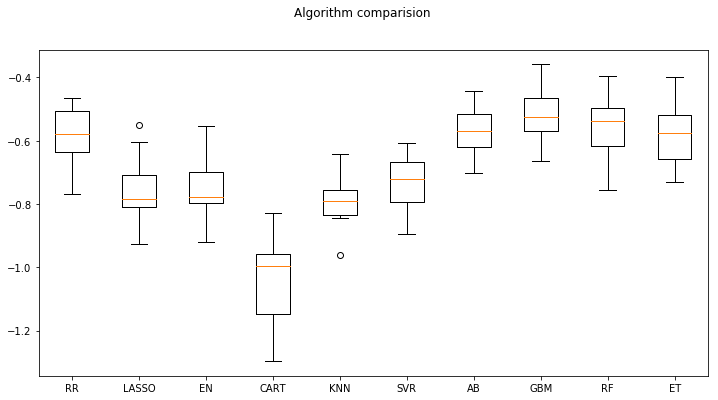

In [80]:
# Compare algorithm with box plot representation
# Remove LR to have proper scale
results.pop(0)
names.pop(0)
fig = plt.figure(figsize=(12,6))
fig.suptitle('Algorithm comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Perform the preprocessing by scaling input data to see if any improvement for our algorithms examination
http://benalexkeen.com/feature-scaling-with-scikit-learn/

In [81]:
#Standadize the dataset
#Haha, now the winner is SVR (Support Vector Machine Regression) with RobustScaler method applied
def preprocess_method_comparison(X_train, Y_train, scale_method):
    pipelines = []
    if scale_method=='standard':
        pipelines.append(('ScaledRR', Pipeline([('Scaler', StandardScaler()), ('RR', Ridge())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()), ('SVR', SVR())])))
        pipelines.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()), ('AB', AdaBoostRegressor())])))
        pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()), ('GBM', GradientBoostingRegressor())])))
        pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()), ('RT', RandomForestRegressor())])))
        pipelines.append(('ScaledET', Pipeline([('Scaler', StandardScaler()), ('ET', ExtraTreesRegressor())])))
    elif scale_method=='min_max':
        pipelines.append(('ScaledRR', Pipeline([('Scaler', MinMaxScaler()), ('RR', Ridge())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler()), ('SVR', SVR())])))
        pipelines.append(('ScaledAB', Pipeline([('Scaler', MinMaxScaler()), ('AB', AdaBoostRegressor())])))
        pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()), ('GBM', GradientBoostingRegressor())])))
        pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()), ('RT', RandomForestRegressor())])))
        pipelines.append(('ScaledET', Pipeline([('Scaler', MinMaxScaler()), ('ET', ExtraTreesRegressor())])))
    elif scale_method=='robust':
        pipelines.append(('ScaledRR', Pipeline([('Scaler', RobustScaler()), ('RR', Ridge())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', RobustScaler()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', RobustScaler()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', RobustScaler()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', RobustScaler()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', RobustScaler()), ('SVR', SVR())])))
        pipelines.append(('ScaledAB', Pipeline([('Scaler', RobustScaler()), ('AB', AdaBoostRegressor())])))
        pipelines.append(('ScaledGBM', Pipeline([('Scaler', RobustScaler()), ('GBM', GradientBoostingRegressor())])))
        pipelines.append(('ScaledRF', Pipeline([('Scaler', RobustScaler()), ('RT', RandomForestRegressor())])))
        pipelines.append(('ScaledET', Pipeline([('Scaler', RobustScaler()), ('ET', ExtraTreesRegressor())])))
    elif scale_method=='normalizer':
        pipelines.append(('ScaledRR', Pipeline([('Scaler', Normalizer()), ('RR', Ridge())])))
        pipelines.append(('ScaledLASSO', Pipeline([('Scaler', Normalizer()), ('LASSO', Lasso())])))
        pipelines.append(('ScaledEN', Pipeline([('Scaler', Normalizer()), ('EN', ElasticNet())])))
        pipelines.append(('ScaledCART', Pipeline([('Scaler', Normalizer()), ('CART', DecisionTreeRegressor())])))
        pipelines.append(('ScaledKNN', Pipeline([('Scaler', Normalizer()), ('KNN', KNeighborsRegressor())])))
        pipelines.append(('ScaledSVM', Pipeline([('Scaler', Normalizer()), ('SVR', SVR())])))
        pipelines.append(('ScaledAB', Pipeline([('Scaler', Normalizer()), ('AB', AdaBoostRegressor())])))
        pipelines.append(('ScaledGBM', Pipeline([('Scaler', Normalizer()), ('GBM', GradientBoostingRegressor())])))
        pipelines.append(('ScaledRF', Pipeline([('Scaler', Normalizer()), ('RT', RandomForestRegressor())])))
        pipelines.append(('ScaledET', Pipeline([('Scaler', Normalizer()), ('ET', ExtraTreesRegressor())])))
    
    # Score printing
    results = []
    names = []
    print("\t MSE Mean \t MSE std \tTime")
    for name, model in pipelines:
        startTimeModule = datetime.now()
        kfold = KFold(n_splits=10, random_state=41)
        cv_result = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
        results.append(cv_result)
        names.append(name)
        print("%a\t: %.2f \t%.2f \t%s"%(name, cv_result.mean(), cv_result.std(), datetime.now() - startTimeModule))
    
    
    
    #Plotting
    fig = plt.figure(figsize=(12,6))
    fig.suptitle(scale_method + " scaler")
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

	 MSE Mean 	 MSE std 	Time
'ScaledRR'	: -0.58 	0.09 	0:00:00.047910
'ScaledLASSO'	: -0.79 	0.11 	0:00:00.037897
'ScaledEN'	: -0.79 	0.11 	0:00:00.036447
'ScaledCART'	: -1.02 	0.13 	0:00:00.312709
'ScaledKNN'	: -0.62 	0.09 	0:00:00.345147
'ScaledSVM'	: -0.53 	0.10 	0:00:07.388093
'ScaledAB'	: -0.57 	0.08 	0:00:02.199956
'ScaledGBM'	: -0.52 	0.09 	0:00:02.199171
'ScaledRF'	: -0.57 	0.10 	0:00:01.946229
'ScaledET'	: -0.56 	0.10 	0:00:00.839420


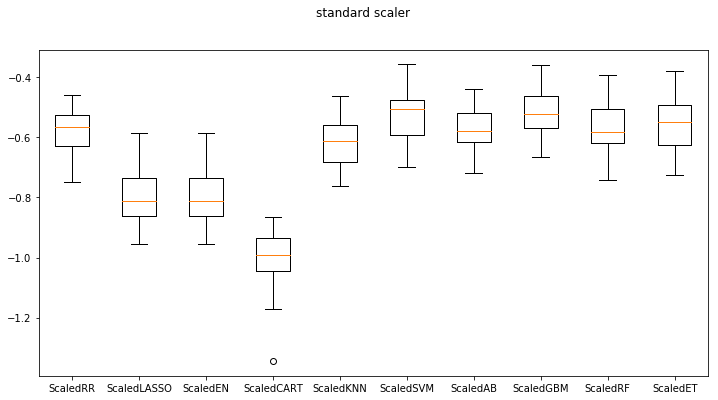

In [69]:
preprocess_method_comparison(X_train, Y_train, 'standard')

	 MSE Mean 	 MSE std 	Time
'ScaledRR'	: -0.58 	0.09 	0:00:00.057957
'ScaledLASSO'	: -0.79 	0.11 	0:00:00.046230
'ScaledEN'	: -0.79 	0.11 	0:00:00.035815
'ScaledCART'	: -1.01 	0.15 	0:00:00.337688
'ScaledKNN'	: -0.62 	0.10 	0:00:00.367254
'ScaledSVM'	: -0.58 	0.09 	0:00:07.160858
'ScaledAB'	: -0.57 	0.08 	0:00:02.756114
'ScaledGBM'	: -0.52 	0.09 	0:00:02.408249
'ScaledRF'	: -0.57 	0.10 	0:00:02.104714
'ScaledET'	: -0.58 	0.11 	0:00:00.943241


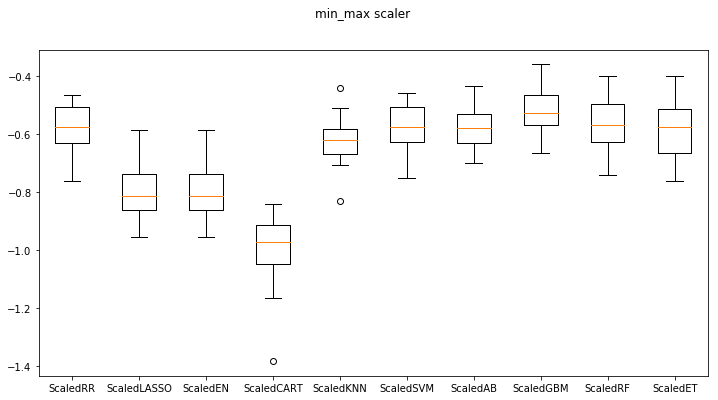

In [82]:
preprocess_method_comparison(X_train, Y_train, 'min_max')

	 MSE Mean 	 MSE std 	Time
'ScaledRR'	: -0.58 	0.09 	0:00:00.098846
'ScaledLASSO'	: -0.79 	0.11 	0:00:00.067166
'ScaledEN'	: -0.79 	0.11 	0:00:00.063269
'ScaledCART'	: -1.02 	0.14 	0:00:00.344268
'ScaledKNN'	: -0.61 	0.10 	0:00:00.369077
'ScaledSVM'	: -0.53 	0.10 	0:00:07.911496
'ScaledAB'	: -0.57 	0.08 	0:00:02.237253
'ScaledGBM'	: -0.52 	0.09 	0:00:02.238733
'ScaledRF'	: -0.57 	0.09 	0:00:01.969480
'ScaledET'	: -0.57 	0.09 	0:00:00.858008


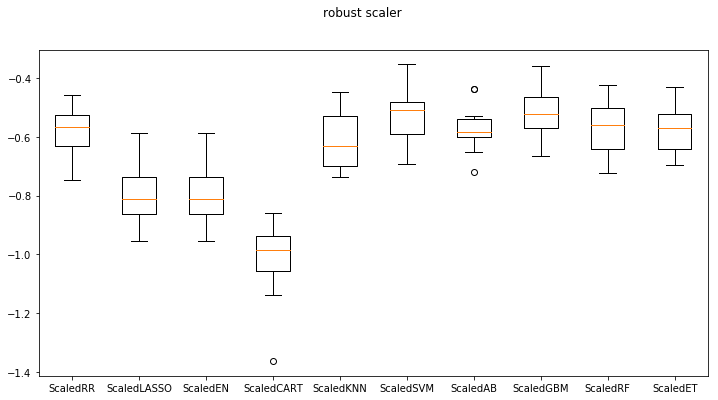

In [83]:
preprocess_method_comparison(X_train, Y_train, 'robust')

	 MSE Mean 	 MSE std 	Time
'ScaledRR'	: -0.71 	0.10 	0:00:00.042050
'ScaledLASSO'	: -0.79 	0.11 	0:00:00.032854
'ScaledEN'	: -0.79 	0.11 	0:00:00.029814
'ScaledCART'	: -1.09 	0.15 	0:00:00.475302
'ScaledKNN'	: -0.78 	0.11 	0:00:00.094636
'ScaledSVM'	: -0.76 	0.11 	0:00:05.839081
'ScaledAB'	: -0.62 	0.08 	0:00:02.776568
'ScaledGBM'	: -0.56 	0.09 	0:00:04.016096
'ScaledRF'	: -0.61 	0.10 	0:00:02.804876
'ScaledET'	: -0.61 	0.09 	0:00:00.854589


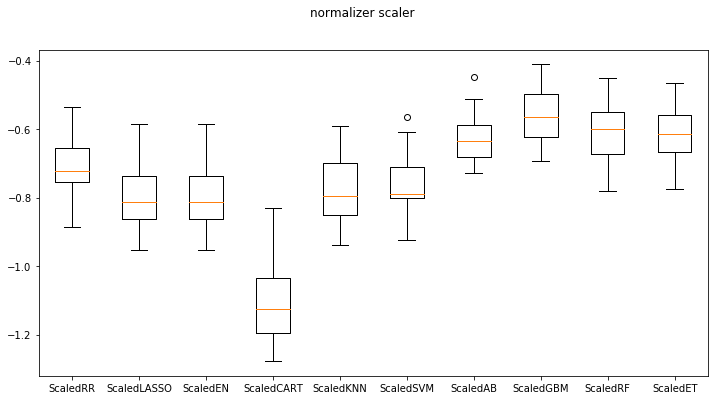

In [84]:
preprocess_method_comparison(X_train, Y_train, 'normalizer')

### 5. Improve Algorithm

In [88]:
# Apply dataset with duplicate removed
# Result is nothing change
results = []
names = []
print("\t MSE Mean \t MSE std \tTime")
for name, model in models:
    startTimeModule = datetime.now()
    kfold = KFold(n_splits=10, random_state=41)
    cv_result = cross_val_score(model, X_train_dup_rev, Y_train_dup_rev, cv=kfold, scoring=scoring)
    results.append(cv_result)
    names.append(name)
    print("%a\t: %.2f \t%.2f \t%s"%(name, cv_result.mean(), cv_result.std(), datetime.now() - startTimeModule))

	 MSE Mean 	 MSE std 	Time
'LR'	: -inf 	nan 	0:00:00.037154
'RR'	: -0.57 	0.10 	0:00:00.026208
'LASSO'	: -0.76 	0.13 	0:00:00.020725
'EN'	: -0.75 	0.13 	0:00:00.021888


/Users/vanducng/anaconda3/lib/python3.6/site-packages/sklearn/metrics/regression.py:239: RuntimeWarning: overflow encountered in square
  output_errors = np.average((y_true - y_pred) ** 2, axis=0,
/Users/vanducng/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


'CART'	: -1.01 	0.12 	0:00:00.261326
'KNN'	: -0.74 	0.09 	0:00:00.054867
'SVR'	: -0.72 	0.10 	0:00:09.919319
'AB'	: -0.57 	0.10 	0:00:02.229326
'GBM'	: -0.52 	0.09 	0:00:01.839069
'RF'	: -0.57 	0.09 	0:00:01.651166
'ET'	: -0.56 	0.09 	0:00:00.760473


In [89]:
# Fine tuning
# Finding the best estimator for GBR algorithm, result is no different as it select default n_estimator of 100
param_grid = dict(n_estimators = np.array([50, 100, 150, 200, 250, 300, 350, 400, 450, 500]))
model = GradientBoostingRegressor(random_state=41)
kfold = KFold(n_splits=10, random_state=41)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print(f"Best: {grid_result.best_score_, grid_result.best_params_}")

Best: (-0.5226749310660679, {'n_estimators': 100})


### 6. Finalize model

In [91]:
# Rebuild the finalized model
startTimeScript = datetime.now()
model = GradientBoostingRegressor(random_state=7, n_estimators=100)
model.fit(X_train, Y_train)
print ('Total time for model training:',(datetime.now() - startTimeScript))

# Evaluate the final model
predictions = model.predict(X_test)
print(mean_squared_error(Y_test, predictions))

# Result: it took 0.24s to train the model
# And the MSE result is 0.33 which is even better than the result of training dataset

Total time for model training: 0:00:00.241025
0.33430967863261224
